In [88]:
import torch 
from torch import nn 
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from collections import OrderedDict
import helper

In [14]:

transform = transforms.Compose([transforms.ToTensor(), 
                              transforms.Normalize((0.5), (0.5))])

trainset = datasets.MNIST("MNIST_data/",download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [17]:
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(input_size, hidden_sizes[0])), 
    ('relu1', nn.ReLU()), 
    ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])), 
    ('relu2', nn.ReLU()), 
    ('logits', nn.Linear(hidden_sizes[1], output_size))
]))
print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)


In [78]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr= 0.003)

In [84]:
epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss +=loss.item()
        
        if steps % 40 == 0:
            print(f'epoch {e+1}/{epochs}', 'loss: {:.4f}'.format(running_loss/print_every))
            running_loss = 0

epoch 1/3 loss: 0.4385
epoch 1/3 loss: 0.4421
epoch 1/3 loss: 0.4576
epoch 1/3 loss: 0.4398
epoch 1/3 loss: 0.4322
epoch 1/3 loss: 0.4110
epoch 1/3 loss: 0.4446
epoch 1/3 loss: 0.4011
epoch 1/3 loss: 0.4490
epoch 1/3 loss: 0.4366
epoch 1/3 loss: 0.4179
epoch 1/3 loss: 0.4290
epoch 1/3 loss: 0.4289
epoch 1/3 loss: 0.4240
epoch 1/3 loss: 0.4369
epoch 1/3 loss: 0.4341
epoch 1/3 loss: 0.4162
epoch 1/3 loss: 0.4220
epoch 1/3 loss: 0.4074
epoch 1/3 loss: 0.4122
epoch 1/3 loss: 0.4021
epoch 1/3 loss: 0.3922
epoch 1/3 loss: 0.4079
epoch 2/3 loss: 0.2140
epoch 2/3 loss: 0.3932
epoch 2/3 loss: 0.3974
epoch 2/3 loss: 0.3852
epoch 2/3 loss: 0.3893
epoch 2/3 loss: 0.3841
epoch 2/3 loss: 0.3726
epoch 2/3 loss: 0.3877
epoch 2/3 loss: 0.3845
epoch 2/3 loss: 0.3961
epoch 2/3 loss: 0.3820
epoch 2/3 loss: 0.4022
epoch 2/3 loss: 0.3655
epoch 2/3 loss: 0.3894
epoch 2/3 loss: 0.3866
epoch 2/3 loss: 0.3842
epoch 2/3 loss: 0.4243
epoch 2/3 loss: 0.3809
epoch 2/3 loss: 0.3710
epoch 2/3 loss: 0.3657
epoch 2/3 l

In [86]:
epochs = 3
print_every = 40
steps = 0
for i in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print(f'epochs {i+1}/{epochs}', 'loss{:0.4f}'.format(running_loss/print_every))
            running_loss = 0

epochs 1/3 loss0.3244
epochs 1/3 loss0.2994
epochs 1/3 loss0.3116
epochs 1/3 loss0.3070
epochs 1/3 loss0.3219
epochs 1/3 loss0.2998
epochs 1/3 loss0.3145
epochs 1/3 loss0.3076
epochs 1/3 loss0.2907
epochs 1/3 loss0.3266
epochs 1/3 loss0.3075
epochs 1/3 loss0.3041
epochs 1/3 loss0.3139
epochs 1/3 loss0.3061
epochs 1/3 loss0.2975
epochs 1/3 loss0.2977
epochs 1/3 loss0.2814
epochs 1/3 loss0.3176
epochs 1/3 loss0.3049
epochs 1/3 loss0.3198
epochs 1/3 loss0.3027
epochs 1/3 loss0.2860
epochs 1/3 loss0.3065
epochs 2/3 loss0.1734
epochs 2/3 loss0.3174
epochs 2/3 loss0.3249
epochs 2/3 loss0.2939
epochs 2/3 loss0.2783
epochs 2/3 loss0.3040
epochs 2/3 loss0.2808
epochs 2/3 loss0.2727
epochs 2/3 loss0.3034
epochs 2/3 loss0.3024
epochs 2/3 loss0.2956
epochs 2/3 loss0.2789
epochs 2/3 loss0.2898
epochs 2/3 loss0.2899
epochs 2/3 loss0.2894
epochs 2/3 loss0.2897
epochs 2/3 loss0.3197
epochs 2/3 loss0.3027
epochs 2/3 loss0.2862
epochs 2/3 loss0.3151
epochs 2/3 loss0.3096
epochs 2/3 loss0.3050
epochs 2/3

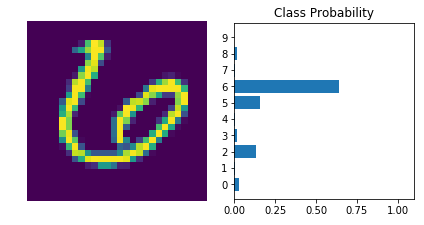

In [94]:
images, labels = next(iter(trainloader))

img = images[63].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
helper.view_classify(img.view(1, 28, 28), ps)